![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# #02 | Why gender was the most important factor to survive the Titanic

![](src/tree.jpg)

Learn how to develop a Decision Tree Classifier in Python to understand why gender was the most important factor to survive the Titanic accident.

## Introduction to Supervised Classification Models

Machine Learning is a field that focuses on [**getting a mathematical equation**](https://twitter.com/sotastica/status/1449735653328031745) to make predictions about the future. Although not all Machine Learning models work the same way.

Which types of Machine Learning models can we distinguish so far?

- **Classifiers** to predict **Categorical Variables**
- **Regressors** to predict **Numerical Variables**

The previous chapter covered the explanation of a Regressor model: the Linear Regression.

This chapter covers the explanation of a Classification model: the Decision Tree.

Why do they belong to Machine Learning?

- The Machine wants to get the best numbers of a mathematical equation such that **the difference between reality and predictions is minimum**:

    - **Classifier** evaluates the model based on **prediction success rate**
        $$
        y \stackrel{?}{=} \hat y
        $$
    - **Regressor** evaluates the model based on the **distance between real data and predictions** (residuals) 
        $$
        y - \hat y
        $$

There are many Machine Learning Models of each type.

You don't need to know the process behind each model because they all work the same way (see article). In the end, you will choose the one makes better predictions.

This tutorial will show you how to develop a Decision Tree to calculate the probability of a person to survive the Titanic and the different evaluation metrics we can calculate on Classification Models.

**Table of Important Content**

1. 🛀 [How to preprocess/clean the data to fit a Machine Learning model?](#Data-Preprocessing)
    - Dummy Variables
    - Missing Data
2. 🤩 [How to **visualize** a Decision Tree model in Python step by step?](#Model-Visualization)
3. 🤔 [How to **interpret** the nodes and leafs values of a Decision Tree plot?](#Model-Interpretation)
4. ⚠️ How to **evaluate** Classification models?
    - [Accuracy](#Model's-Score)
    - [Confussion Matrix](#The-Confusion-Matrix-to-compute-Other-Classification-Metrics)
        - Sensitivity
        - Specificity
        - ROC Curve
5. 🏁 [How to compare Classification models to choose the best one?](#Which-One-Is-the-Best-Model?-Why?)

## [ ] Load the Data

- This dataset represents **people** (rows) aboard the Titanic
- And their **sociological characteristics** (columns)

In [2]:
import seaborn as sns #!
import pandas as pd

df_titanic = sns.load_dataset(name='titanic')[['survived', 'sex', 'age', 'embarked', 'class']]
df_titanic

,survived,sex,age,embarked,class
0,0,male,22.0,S,Third
1,1,female,38.0,C,First
2,1,female,26.0,S,Third
3,1,female,35.0,S,First
4,0,male,35.0,S,Third
...,...,...,...,...,...
886,0,male,27.0,S,Second
887,1,female,19.0,S,First
888,0,female,NaN,S,Third
889,1,male,26.0,C,First


## How do we compute a Decision Tree Model in Python?

### Import the Class

In [3]:
from sklearn.tree import DecisionTreeClassifier

### Instantiante the Class

In [4]:
model_dt= DecisionTreeClassifier()

### Access the Function

### Separate the Variables

In [5]:
features =df_titanic.drop(columns= 'survived')
target =df_titanic[['survived']]

### Fit the Model

In [6]:
model_dt.fit(X=features ,y=target)

ValueError: could not convert string to float: 'male'

## [ ] Data Preprocessing

In [7]:
df_titanic

,survived,sex,age,embarked,class
0,0,male,22.0,S,Third
1,1,female,38.0,C,First
2,1,female,26.0,S,Third
3,1,female,35.0,S,First
4,0,male,35.0,S,Third
...,...,...,...,...,...
886,0,male,27.0,S,Second
887,1,female,19.0,S,First
888,0,female,NaN,S,Third
889,1,male,26.0,C,First


### Dummy Variables

In [8]:
df_titanic=pd.get_dummies(data=df_titanic)

In [9]:
df_titanic=pd.get_dummies(data=df_titanic,drop_first=True)
df_titanic

,survived,age,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,22.0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,0,1,0,0
2,1,26.0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,0,0,1,1,0,0
4,0,35.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,1,0,0,1,0,1,0
887,1,19.0,1,0,0,0,1,1,0,0
888,0,NaN,1,0,0,0,1,0,0,1
889,1,26.0,0,1,1,0,0,1,0,0


**Fit the Model Again**

In [10]:
features =df_titanic.drop(columns='survived')
target =df_titanic[['survived']]

In [11]:
model_dt.fit(X=features , y=target)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Missing Data

In [12]:
df_titanic.isna().sum()

survived          0
age             177
sex_female        0
sex_male          0
embarked_C        0
embarked_Q        0
embarked_S        0
class_First       0
class_Second      0
class_Third       0
dtype: int64

In [13]:
df_titanic=df_titanic.dropna()
df_titanic

,survived,age,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,22.0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,0,1,0,0
2,1,26.0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,0,0,1,1,0,0
4,0,35.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,1,0,0,1,0,0,0,1
886,0,27.0,0,1,0,0,1,0,1,0
887,1,19.0,1,0,0,0,1,1,0,0
889,1,26.0,0,1,1,0,0,1,0,0


**Fit the Model Again**

In [14]:
features = df_titanic.drop(columns='survived')
target =df_titanic[['survived']]

In [15]:
model_dt.fit(X=features ,y=target)

DecisionTreeClassifier()

### [ ] Model Visualization

In [16]:
from sklearn.tree import plot_tree

[Text(0.5, 0.8333333333333334, 'sex_female <= 0.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]'),
 Text(0.25, 0.5, 'age <= 6.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.295\nsamples = 429\nvalue = [352, 77]'),
 Text(0.75, 0.5, 'class_Third <= 0.5\ngini = 0.37\nsamples = 261\nvalue = [64, 197]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.107\nsamples = 159\nvalue = [9, 150]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.497\nsamples = 102\nvalue = [55, 47]')]

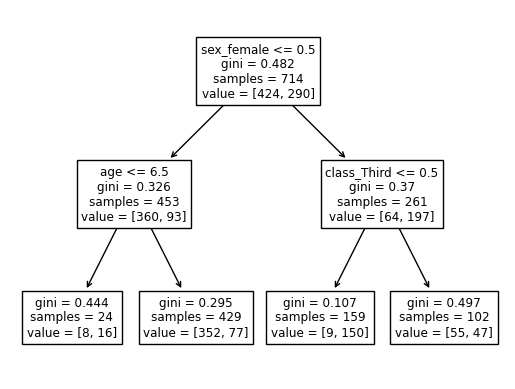

In [17]:
model_dt =DecisionTreeClassifier(max_depth=2)
model_dt.fit(X=features, y=target)
plot_tree(decision_tree=model_dt, feature_names=features.columns)

In [18]:
import matplotlib.pyplot as plt

[Text(0.5, 0.8333333333333334, 'sex_female <= 0.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]'),
 Text(0.25, 0.5, 'age <= 6.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.295\nsamples = 429\nvalue = [352, 77]'),
 Text(0.75, 0.5, 'class_Third <= 0.5\ngini = 0.37\nsamples = 261\nvalue = [64, 197]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.107\nsamples = 159\nvalue = [9, 150]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.497\nsamples = 102\nvalue = [55, 47]')]

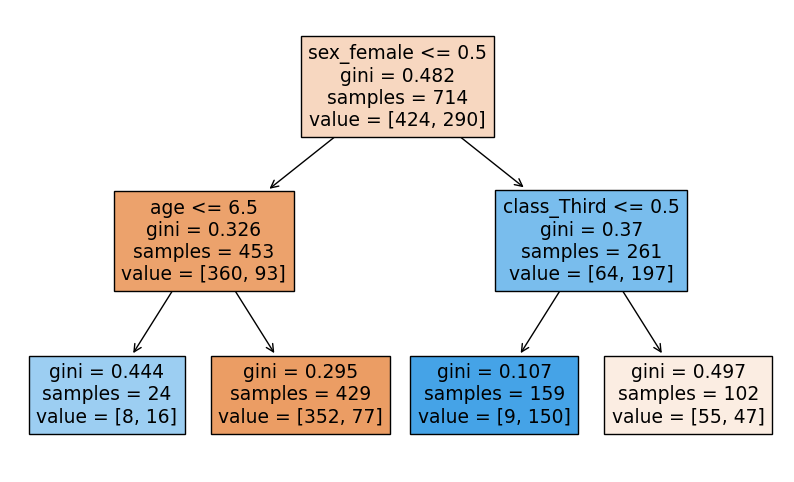

In [19]:
plt.figure(figsize= (10 , 6))
plot_tree(decision_tree=model_dt,feature_names=features.columns ,filled=True)

### [ ] Model Interpretation

### use python slice oprator to copy rows

In [20]:
features[:1]

,age,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,22.0,0,1,0,0,1,0,0,1


### king is male =1 and 1 is  greater than 0.5 we move  left
### kind age is 22 is greater than 6.5 we move left
### sample size =  429
### suivival = 77
### surivival/ sample size = 77/429

In [21]:
77/429

0.1794871794871795

In [22]:
model_dt.predict_proba(X=features)[:1]

array([[0.82051282, 0.17948718]])

In [23]:
features[2:3]

,age,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
2,26.0,1,0,0,0,1,0,0,1


### queen is female =1 and 1 is  greater than 0.5 we move  right cause she is female
### queen class =1 is greater than 0.5 we move left
### sample size =  102
### suivival = 47
### surivival/ sample size = 47/102

In [24]:
47/102

0.46078431372549017

In [25]:
model_dt.predict_proba(X=features)[2:3]

array([[0.53921569, 0.46078431]])

### Predictions

#### Calculate Predictions

In [26]:
model_dt.predict(X=features)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

#### Add a New Column with the Predictions

In [27]:
model_dt.predict_proba(X= features)[:1]

array([[0.82051282, 0.17948718]])

In [28]:
df_pred=df_titanic[['survived']].copy(True)
df_pred

,survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [29]:
df_pred['predict'] =model_dt.predict(X=features)

In [30]:
import numpy as np

#### The Score Step-by-step

In [31]:
model_dt.predict_proba(X=features)[:5]

array([[0.82051282, 0.17948718],
       [0.05660377, 0.94339623],
       [0.53921569, 0.46078431],
       [0.05660377, 0.94339623],
       [0.82051282, 0.17948718]])

In [32]:
df_pred['prob'] = model_dt.predict_proba(X=features)[:,1]
df_pred

,survived,predict,prob
0,0,0,0.179487
1,1,1,0.943396
2,1,0,0.460784
3,1,1,0.943396
4,0,0,0.179487
...,...,...,...
885,0,0,0.460784
886,0,0,0.179487
887,1,1,0.943396
889,1,0,0.179487


In [33]:
df_pred.prob > 0.5

0      False
1       True
2      False
3       True
4      False
       ...  
885    False
886    False
887     True
889    False
890    False
Name: prob, Length: 714, dtype: bool

In [34]:
import numpy as np

In [35]:
df_pred['predict'] =np.where(df_pred.prob > 0.5 ,1, 0)

In [36]:
df_pred

,survived,predict,prob
0,0,0,0.179487
1,1,1,0.943396
2,1,0,0.460784
3,1,1,0.943396
4,0,0,0.179487
...,...,...,...
885,0,0,0.460784
886,0,0,0.179487
887,1,1,0.943396
889,1,0,0.179487


In [37]:
df_titanic['prediction']= model_dt.predict(X=features) 
df_titanic

C:\Users\USER\AppData\Local\Temp\ipykernel_8684\1743841676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic['prediction']= model_dt.predict(X=features)


,survived,age,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,prediction
0,0,22.0,0,1,0,0,1,0,0,1,0
1,1,38.0,1,0,1,0,0,1,0,0,1
2,1,26.0,1,0,0,0,1,0,0,1,0
3,1,35.0,1,0,0,0,1,1,0,0,1
4,0,35.0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,1,0,0,1,0,0,0,1,0
886,0,27.0,0,1,0,0,1,0,1,0,0
887,1,19.0,1,0,0,0,1,1,0,0,1
889,1,26.0,0,1,1,0,0,1,0,0,0


In [38]:
df_pred.survived == df_pred.predict

0       True
1       True
2      False
3       True
4       True
       ...  
885     True
886     True
887     True
889    False
890     True
Length: 714, dtype: bool

In [39]:
compare =df_pred.survived == df_pred.predict
compare

0       True
1       True
2      False
3       True
4       True
       ...  
885     True
886     True
887     True
889    False
890     True
Length: 714, dtype: bool

In [40]:
compare.sum()

573

In [41]:
compare.sum()/len(compare)

0.8025210084033614

In [42]:
compare.mean()

0.8025210084033614

### [ ] Model's Score

#### Calculate the Score

In [43]:
model_dt.score(X=features,y=target)

0.8025210084033614

### [ ] The Confusion Matrix to Compute Other Classification Metrics

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
confusion_matrix(y_true=df_pred.survived,
                y_pred=df_pred.predict)

array([[407,  17],
       [124, 166]], dtype=int64)

In [46]:
matrix=confusion_matrix(y_true=df_pred.survived,
                y_pred=df_pred.predict)                                                                                        

In [47]:
matrix = ConfusionMatrixDisplay(matrix)

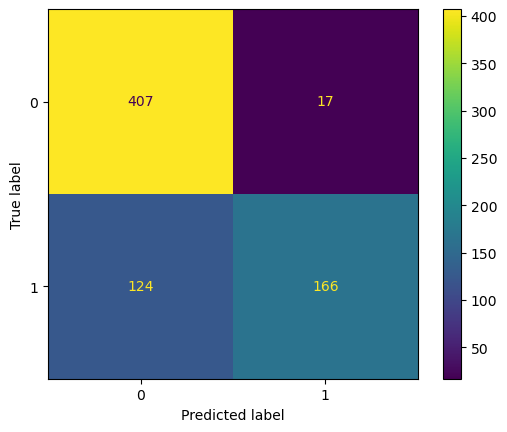

In [48]:
matrix.plot()

#### Specificity (Recall=0)

### MODEL PREDICT 407 WHO DIE & 17 SURIVIVAL

In [49]:
407/(407+17)

0.9599056603773585

#### Sensitivity (Recall=1)

### model  predict 124 WHO DIE
### model predict 166 SURIVIVAL


In [50]:
166/(166+124)

0.5724137931034483

#### Classification Report

In [51]:
from sklearn.metrics import classification_report

In [52]:
classification_report(y_true=df_pred.survived, y_pred=df_pred.predict)

'              precision    recall  f1-score   support\n\n           0       0.77      0.96      0.85       424\n           1       0.91      0.57      0.70       290\n\n    accuracy                           0.80       714\n   macro avg       0.84      0.77      0.78       714\nweighted avg       0.82      0.80      0.79       714\n'

In [53]:
report =classification_report(y_true=df_pred.survived, y_pred=df_pred.predict)

In [54]:
print(report)

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       424
           1       0.91      0.57      0.70       290

    accuracy                           0.80       714
   macro avg       0.84      0.77      0.78       714
weighted avg       0.82      0.80      0.79       714



#### [ ] ROC Curve

In [55]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4jRBRDbJemM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [56]:
from sklearn.metrics import RocCurveDisplay

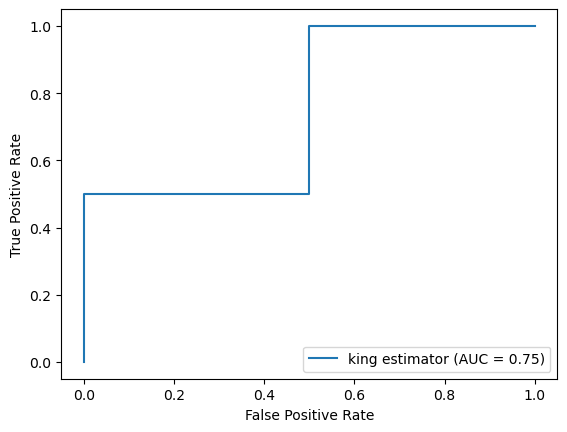

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
y= np.array([0,0,1,1])
predict= np.array([0.1, 0.4, 0.35,0.8])
fpr,tpr, thresholds = metrics.roc_curve(y,predict)
roc_auc = metrics.auc(fpr,  tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name="king estimator")
display.plot()
plt.show()

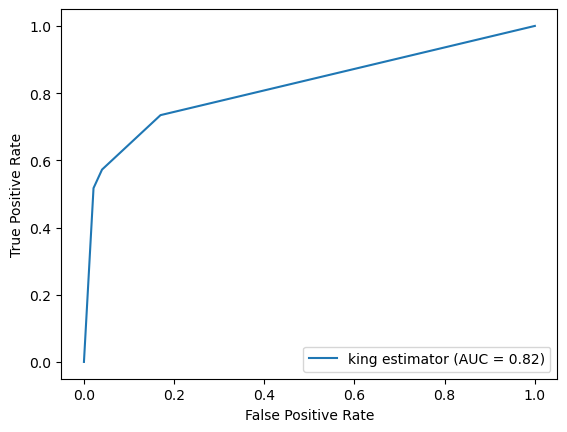

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
y= df_pred.survived
predict= model_dt.predict_proba(X=features)[:,1]
fpr,tpr, thresholds = metrics.roc_curve(y,predict)
roc_auc = metrics.auc(fpr,  tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name="king estimator")
display.plot()
plt.show()

## [ ] Other Classification Models

### `RandomForestClassifier()` in Python

## import randomforestclassifier from sk learn

In [59]:
from sklearn.ensemble import RandomForestClassifier

### Instantiante the Class

In [60]:
model_lr = RandomForestClassifier()

#### Fit the Model

In [61]:
model_lr.fit(X=features ,y= target)

C:\Users\USER\AppData\Local\Temp\ipykernel_8684\3615616333.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_lr.fit(X=features ,y= target)


RandomForestClassifier()

#### Calculate Predictions

In [62]:
model_lr.predict(X=features)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

#### Model's Score

In [63]:
model_lr.score(X=features,y=target)

0.9117647058823529

### `SVC()` in Python

### import svc() from sklearn

In [64]:
from sklearn.svm import SVC

### instantiante the Class

In [65]:
model_svc = SVC()

#### Fit the Model

In [66]:
model_svc.fit(X=features, y=target)

C:\Users\USER\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

#### Calculate Predictions

In [67]:
model_svc.predict(X=features)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

#### Model's Score

In [68]:
model_svc.score(X=features, y=target)

0.6134453781512605

## Which One Is the Best Model? Why?

In [69]:
import pandas as pd

In [70]:
df_titanic2 =pd.DataFrame()

In [71]:
df_titanic2 ['models']= [model_dt, model_lr,model_svc]

In [72]:
df_titanic2 ['score']= [model_dt.score(X=features , y=target), model_lr.score(X=features,y=target), model_svc.score(X=features,y=target)]

In [73]:
df_titanic2

,models,score
0,DecisionTreeClassifier(max_depth=2),0.802521
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.911765
2,SVC(),0.613445


### RANDOM FOREST IS THE BEST MODEL WITH A SCORE OF 0.91%

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.